# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Datasets

In [2]:
salesdata = pd.read_csv('C:/Users/MonsterVsAlien/Downloads/Project report/Super_Store.csv')
salesdata.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null object
Ship Date        2121 non-null object
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 348.1+ KB


In [4]:
all_data_pairplot_sales = salesdata[['Quantity','Discount','Profit','Sales']]
all_data_pairplot_sales.describe()

,Quantity,Discount,Profit,Sales
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,3.785007,0.173923,8.699327,349.834887
std,2.251620,0.181547,136.049246,503.179145
min,1.000000,0.000000,-1862.312400,1.892000
25%,2.000000,0.000000,-12.849000,47.040000
50%,3.000000,0.200000,7.774800,182.220000
75%,5.000000,0.300000,33.726600,435.168000
max,14.000000,0.700000,1013.127000,4416.174000


In [5]:
#salesdata['date']=salesdata['Order Date'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%y'))

# Data Visualizations

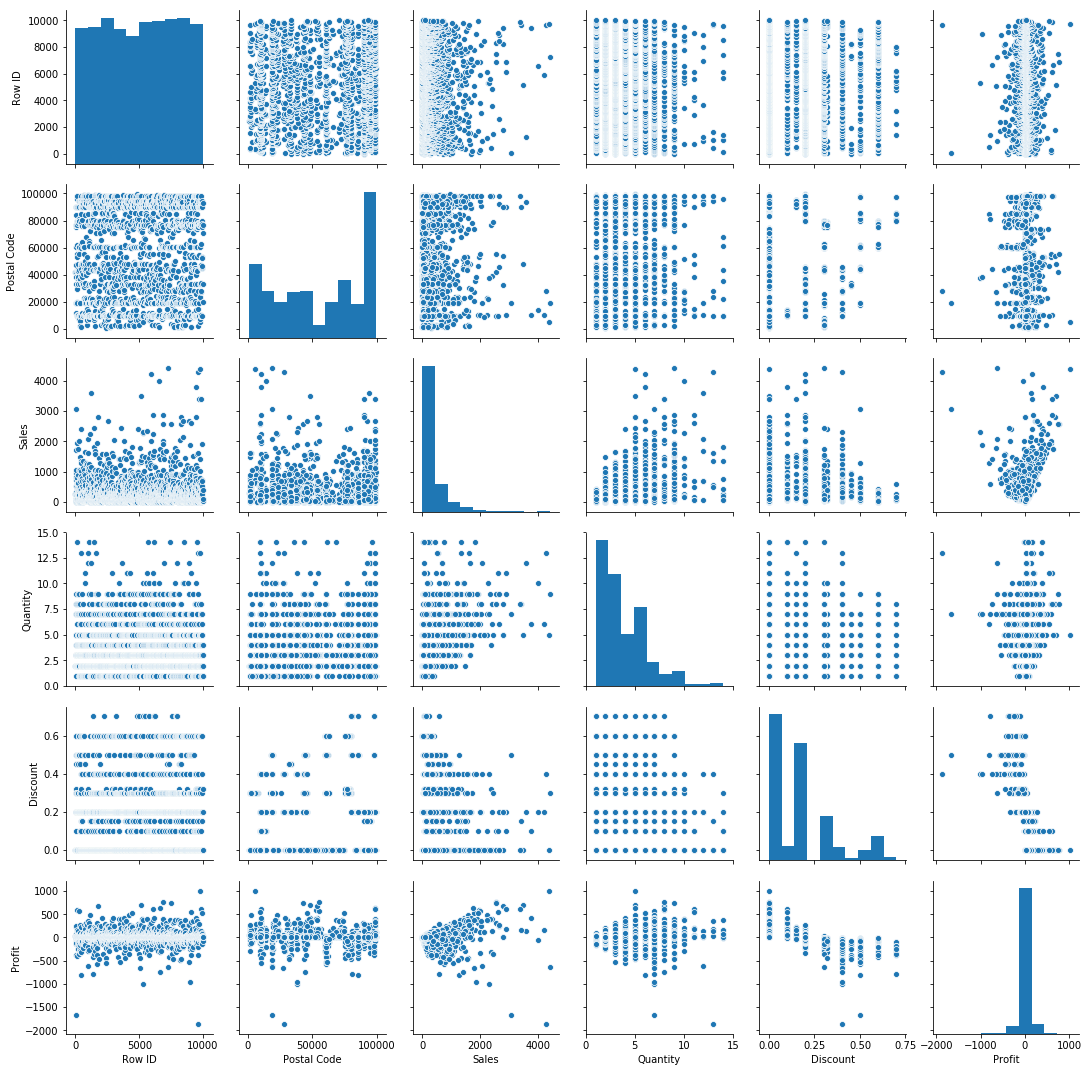

In [6]:
sns.pairplot(salesdata)

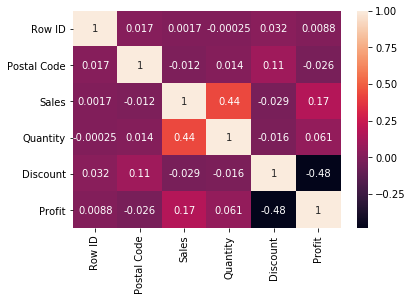

In [7]:
sns.heatmap(salesdata.corr(),annot = True)

In [8]:
all_X = salesdata[['Quantity','Discount','Profit','Postal Code']]
all_y = salesdata['Sales']



In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(all_X,all_y)

In [11]:
X_train.head()

,Quantity,Discount,Profit,Postal Code
1659,2,0.6,-6.8816,77070
683,5,0.0,39.0660,10009
1771,5,0.0,10.4490,1841
1049,5,0.3,-95.6700,77070
1684,3,0.7,-190.8522,80219


In [12]:
from sklearn.neighbors import KNeighborsRegressor


In [13]:
knn = KNeighborsRegressor(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  

In [16]:
#knn_train_score = knn.score(xd_train, yd_train)
knn_test_score = knn.score(X_test, y_test)
#knn_train_mape = mape(y_train, knn_)
knn_test_mape = mape(y_test, knn_pred)
print(knn_test_mape)
print(knn_test_score)

278.07985514043776
0.323440779437163


C:\Users\MonsterVsAlien\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


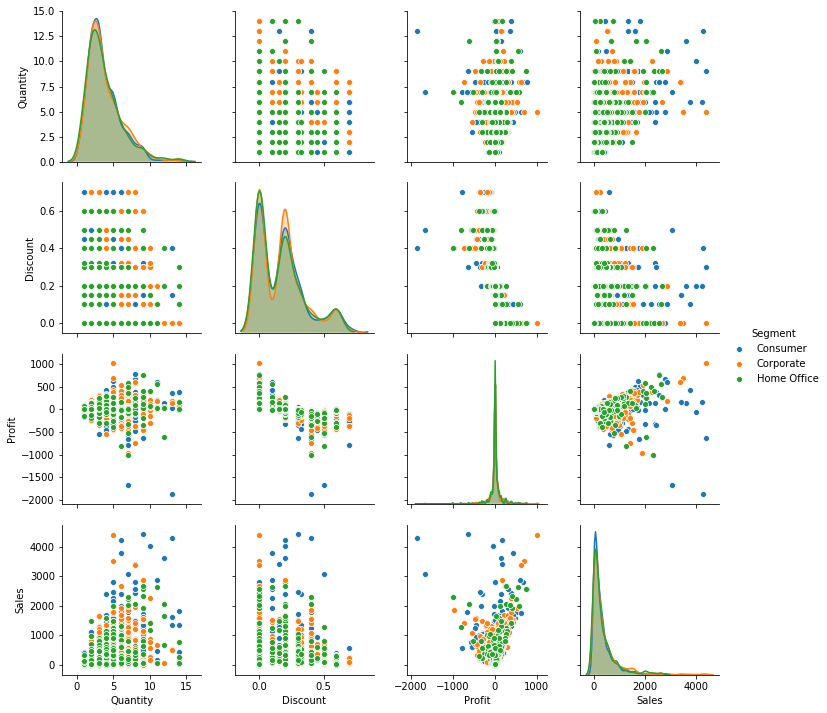

In [17]:
all_data_pairplot_segment = salesdata[['Quantity','Discount','Profit','Sales',"Segment"]]
sns.pairplot(all_data_pairplot_segment,hue='Segment')

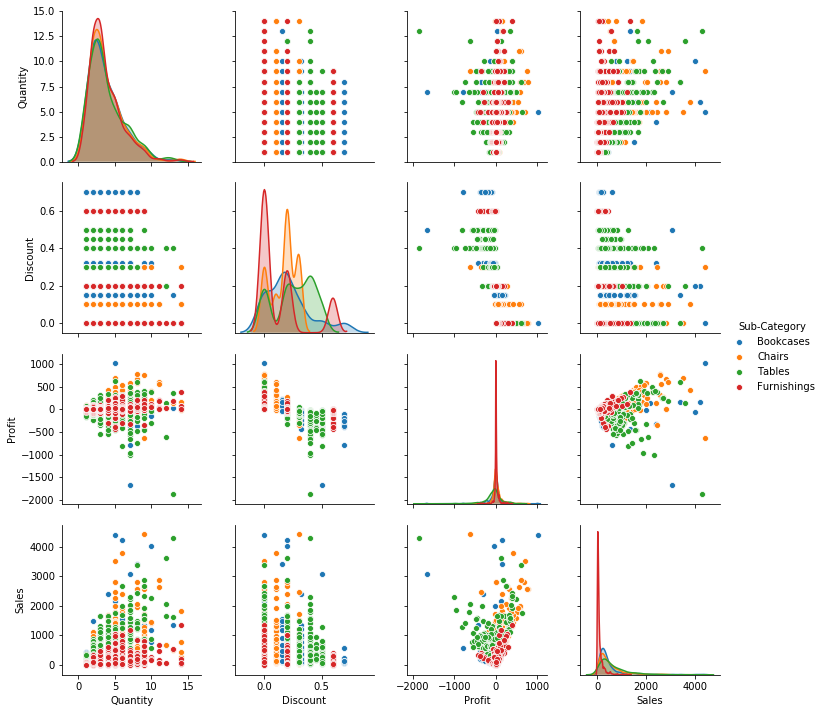

In [18]:
all_data_pairplot_subcat = salesdata[['Quantity','Discount','Profit','Sales',"Sub-Category"]]
sns.pairplot(all_data_pairplot_subcat,hue='Sub-Category')

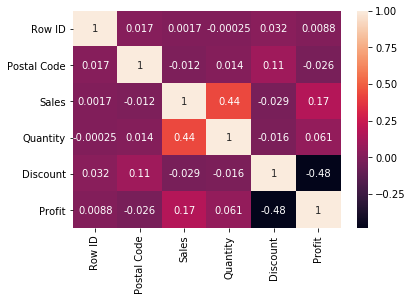

In [19]:
sns.heatmap(salesdata.corr(),annot = True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
all_X = salesdata[['Postal Code','Quantity','Discount','Profit']]
all_y = salesdata['Sales']


In [21]:
X_train,X_test,y_train,y_test = train_test_split(all_X,all_y,test_size=0.2)

In [22]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  


knn_test_score = knn.score(X_test, y_test)
#knn_train_mape = mape(y_train, knn_)
knn_test_mape = mape(y_test, knn_pred)
print(knn_test_mape)
print(knn_test_score)

234.98427257173833
0.280647510693085


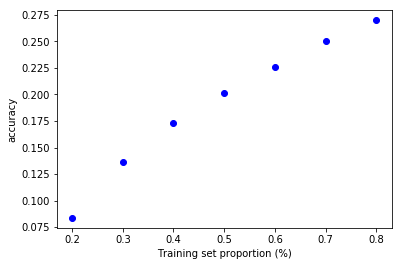

In [24]:
import numpy as np
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsRegressor(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(all_X,all_y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

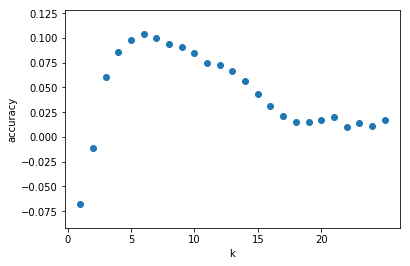

In [25]:
k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

NameError: name 'orderdata' is not defined

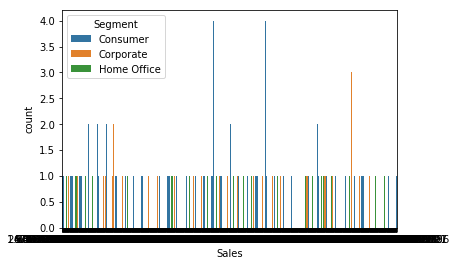

In [27]:
sns.countplot(x="Sales",hue="Segment",data=salesdata)

In [ ]:
orderdata['Category'].unique()

In [ ]:
salesdata['Sub-Category'].unique()

In [ ]:
books = len(salesdata[salesdata["Sub-Category"]== 'Bookcases'])
chairs = len(salesdata[salesdata["Sub-Category"]== 'Chairs'])
tables = len(salesdata[salesdata["Sub-Category"]== 'Tables'])
furnishings = len(salesdata[salesdata["Sub-Category"] == 'Furnishings'])

 
values = [books,chairs,tables,furnishings]
labels = ["Books","Chair","Tables","Furnishings"]
colors = ['lightgreen','red','blue','yellow']
explode = [0.05,0,0,0]
fig = plt.figure(figsize = (4,4))
pie = plt.pie(values, labels = labels, colors = colors, explode = explode, autopct = '%4.2f%%')
plt.title("Sales of each Sub-Category of Furniture of all years")

In [ ]:
sns.lmplot(x='Sales',y='Profit',data=salesdata,hue='Segment',row='Sub-Category',palette='Set1',markers=['o','*','^'], scatter_kws={'s':100})

# Categorical Splitting

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
for column in ['Segment','Sub-Category']:
    salesdata = create_dummies(salesdata,column)
    
salesdata.head()

In [ ]:
salesdata.head()

In [ ]:
df1 = salesdata.copy()

In [ ]:
%matplotlib notebook
sns.heatmap(all_data.corr(),annot = True, fmt = "f",linewidths=0.5,cmap="YlGnBu")

In [ ]:
salesdata.columns

In [ ]:
columns = ["Quantity","Discount","Profit","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables"]
all_X = salesdata[columns]
all_y = salesdata["Sales"]
columns_with_sales = ["Quantity","Discount","Profit","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables","Sales"]
all_data = salesdata[columns_with_sales]

# Train Test Split and Linear Model

In [ ]:
from sklearn.model_selection import train_test_split



train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.1,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()

In [ ]:
linmodel.fit(train_X,train_y)

In [ ]:
lm_score = linmodel.score(test_X,test_y)
lm_score

In [ ]:
from sklearn import metrics 
lm_pred = linmodel.predict(test_X)


In [ ]:
mae_lm= metrics.mean_absolute_error(test_y, lm_pred)
mse_lm = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.2,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_1 = linmodel.score(test_X,test_y)
print(lm_score_1)
lm_pred = linmodel.predict(test_X)

mae_lm_1 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_1 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_1 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm_1)
print('MSE:', mse_lm_1)
print('RMSE:', rmse_lm_1)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.3,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_2 = linmodel.score(test_X,test_y)
print(lm_score_2)

lm_pred = linmodel.predict(test_X)
mae_lm_2 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_2 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_2 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm_2)
print('MSE:', mse_lm_2)
print('RMSE:', rmse_lm_2)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.4,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_3 = linmodel.score(test_X,test_y)
print(lm_score_3)

lm_pred = linmodel.predict(test_X)
mae_lm_3 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_3 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_3 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:', mae_lm_1)
print('MSE:', mse_lm_3)
print('RMSE:', rmse_lm_3)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.35,random_state=0)
linmodel = LinearRegression()
linmodel.fit(train_X,train_y)

lm_score_4 = linmodel.score(test_X,test_y) 
print(lm_score_4)

lm_pred = linmodel.predict(test_X)
mae_lm_4 = metrics.mean_absolute_error(test_y, lm_pred)
mse_lm_4 = metrics.mean_squared_error(test_y, lm_pred)
rmse_lm_4 = np.sqrt(metrics.mean_squared_error(test_y, lm_pred))

print('MAE:',mae_lm_4 )
print('MSE:', mse_lm_4)
print('RMSE:', rmse_lm_4)

In [ ]:
all_models = pd.DataFrame({
    'Model':["Linear Regression with 75/25",'Linear Regression with 80/20','Linear Regression with 70/30','Linear Regression with 90/10','Linear Regression with 65/35',
            'KNN with 75/25','KNN with 80/20','KNN with 70/30','KNN with 90/10','KNN with 65/35'],
    'Score': [lm_score,lm_score_1,lm_score_2,lm_score_3,lm_score_4,knn_score,knn_score_1,knn_score_2,knn_score_3,knn_score_4],
    'Mean Absolute Error': [mae_lm,mae_lm_1,mae_lm_2,mae_lm_3,mae_lm_4,mae_knn,mae_knn_1,mae_knn_2,mae_knn_3,mae_knn_4],
    'Mean Squared Error': [mse_lm,mse_lm_1,mse_lm_2,mse_lm_3,mse_lm_4,mse_knn,mse_knn_1,mse_knn_2,mse_knn_3,mse_knn_4],
    'Root Mean Squared Error':[rmse_lm,rmse_lm_1,rmse_lm_2,rmse_lm_3,rmse_lm_4,rmse_knn,rmse_knn_1,rmse_knn_2,rmse_knn_3,rmse_knn_4]
            })
all_models.sort_values(by='Score',ascending = False)

In [ ]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm,all_X,all_y,cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

# KNN Regressor

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.25,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score = knn.score(test_X,test_y) 
print(knn_score)

knn_pred = knn.predict(test_X)
mae_knn = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn )
print('MSE:', mse_knn)
print('RMSE:', rmse_knn)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.2,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_1 = knn.score(test_X,test_y) 
print(knn_score_1)

knn_pred = knn.predict(test_X)
mae_knn_1 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_1 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_1 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_1 )
print('MSE:', mse_knn_1)
print('RMSE:', rmse_knn_1)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.3,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_2 = knn.score(test_X,test_y) 
print(knn_score_2)

knn_pred = knn.predict(test_X)
mae_knn_2 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_2 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_2 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_2 )
print('MSE:', mse_knn_2)
print('RMSE:', rmse_knn_2)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.1,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_3 = knn.score(test_X,test_y) 
print(knn_score_3)

knn_pred = knn.predict(test_X)
mae_knn_3 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_3 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_3 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_3 )
print('MSE:', mse_knn_3)
print('RMSE:', rmse_knn_3)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.35,random_state=0)
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

knn_score_4 = knn.score(test_X,test_y) 
print(knn_score_4)

knn_pred = knn.predict(test_X)
mae_knn_4 = metrics.mean_absolute_error(test_y, knn_pred)
mse_knn_4 = metrics.mean_squared_error(test_y, knn_pred)
rmse_knn_4 = np.sqrt(metrics.mean_squared_error(test_y, knn_pred))

print('MAE:',mae_knn_4 )
print('MSE:', mse_knn_4)
print('RMSE:', rmse_knn_4)

In [ ]:
all_models

In [ ]:
import numpy as np
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

lm = LinearRegression()

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(all_X,all_y, test_size = 1-s)
        lm.fit(X_train, y_train)
        scores.append(lm.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion  of Linear Regression(%)')
plt.ylabel('accuracy');

In [ ]:
all_knn =  pd.DataFrame({
    'Model':['KNN with 75/25','KNN with 80/20','KNN with 70/30','KNN with 90/10','KNN with 65/35'],
    'Score': [knn_score,knn_score_1,knn_score_2,knn_score_3,knn_score_4],
    'Mean Absolute Error': [mae_knn,mae_knn_1,mae_knn_2,mae_knn_3,mae_knn_4],
    'Mean Squared Error': [mse_knn,mse_knn_1,mse_knn_2,mse_knn_3,mse_knn_4],
    'Root Mean Squared Error':[rmse_knn,rmse_knn_1,rmse_knn_2,rmse_knn_3,rmse_knn_4]
            })
all_knn

In [ ]:
all_knn.sort_values(by='Score',ascending = False)

In [ ]:
all_lm = pd.DataFrame({
    'Model':["Linear Regression with 75/25",'Linear Regression with 80/20','Linear Regression with 70/30','Linear Regression with 90/10','Linear Regression with 65/35'],
    'Score': [lm_score,lm_score_1,lm_score_2,lm_score_3,lm_score_4],
    'Mean Absolute Error': [mae_lm,mae_lm_1,mae_lm_2,mae_lm_3,mae_lm_4],
    'Mean Squared Error': [mse_lm,mse_lm_1,mse_lm_2,mse_lm_3,mse_lm_4],
    'Root Mean Squared Error':[rmse_lm,rmse_lm_1,rmse_lm_2,rmse_lm_3,rmse_lm_4]
            })
all_lm.sort_values(by='Score',ascending = False)

In [ ]:
from sklearn.model_selection import train_test_split

columns_profit = ["Quantity","Discount","Sales","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables"]
all_X_profit = salesdata[columns_profit]
all_y_profit = salesdata["Profit"]


train_X_p,test_X_p,train_y_p,test_y_p = train_test_split(all_X_profit,all_y_profit,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lmp = LinearRegression()
lmp.fit(train_X_p,train_y_p)

In [ ]:
print(lmp.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lmp.coef_,all_X_profit.columns,columns=['Coefficient'])
coeff_df

In [ ]:
salesdata['Country'].unique()

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)

linridge = Ridge(alpha=100.0).fit(X_train, y_train)


In [ ]:
linrid = linridge.score(X_test,y_test)
linrid

# Ridge and Lasso

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
linrid_reg = linridge.score(X_test_scaled,y_test)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)
linlasso_score_reg = linlasso.score(X_test_scaled,y_test)


In [ ]:
from sklearn.linear_model import Lasso


X_train, X_test, y_train, y_test = train_test_split(all_X, all_y,
                                                   random_state = 0)
linlasso.fit(X_train,y_train)
linlasso_score = linlasso.score(X_test,y_test)

In [ ]:
all_models_final = pd.DataFrame({
    'Model':["Linear Regression with 75/25",'Linear Regression with 80/20','Linear Regression with 70/30','Linear Regression with 90/10','Linear Regression with 65/35',
            'KNN with 75/25','KNN with 80/20','KNN with 70/30','KNN with 90/10','KNN with 65/35',
            'Ridge Regression','Ridge Regression with Regularization','Lasso Regrssion',"Lasso Regrssion with Regularization"],
    'Score': [lm_score,lm_score_1,lm_score_2,lm_score_3,lm_score_4,knn_score,knn_score_1,knn_score_2,knn_score_3,knn_score_4,
              linrid,linrid_reg,linlasso_score,linlasso_score_reg]
    
            })
all_models_final.sort_values(by='Score',ascending = False)

In [ ]:
salesdata['Order Date'][45].split("/")[2]

In [ ]:
years_with_sales = salesdata.copy()

In [ ]:
def convert(x):
    y = x.split("/")
    return y[2]

In [ ]:
years_with_sales['Order Date'] = years_with_sales['Order Date'].apply(convert)

In [ ]:
years_with_sales.head()

In [ ]:
years_with_sales['Order Date'].unique()

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
for column in ['Order Date']:
    years_with_sales = create_dummies(years_with_sales,column)
    
years_with_sales.head()

In [ ]:
columns = ["Quantity","Discount","Profit","Segment_Consumer","Segment_Corporate","Segment_Home Office","Sub-Category_Bookcases",
         "Sub-Category_Chairs","Sub-Category_Furnishings","Sub-Category_Tables",'Order Date_2014','Order Date_2015','Order Date_2016','Order Date_2017']
all_X = years_with_sales[columns]
all_y = years_with_sales["Sales"]

In [ ]:
all_X.head()

In [ ]:
all_data_pairplot_years = years_with_sales[['Quantity','Discount','Profit','Sales',"Sub-Category","Order Date"]]
sns.pairplot(all_data_pairplot_years,hue='Order Date')
sns.pairplot()

In [ ]:
salesdata.head()

In [ ]:
salesdata